## IMPORTING LIBRARIES

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## LOADING THE DATASET

In [2]:
dataset = pd.read_excel('New_sub_val_test.xlsx')
dataset.head()

,log(surf T),1/Esat surf,qair-qsurf,sub values
0,5.611032,0.001636,-0.000008,-0.000025
1,5.611032,0.001636,-0.000098,-0.000221
2,5.611032,0.001636,-0.000131,-0.000306
3,5.611032,0.001636,-0.000135,-0.000427
4,5.611032,0.001636,-0.000084,-0.000200


## DEFINING THE X-AXIS & Y-AXIS

In [3]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]

## TRAINING THE DATASET

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## 1) MULTIPLE LINEAR REGRESSION

In [5]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [6]:
# Predicting the Test set results

y_pred = regressor.predict(x_test)

In [8]:
# Obtaining accuracy

multivariate_score=r2_score(y_test,y_pred)
multivariate_score

0.7623975680743708

In [9]:
#finding intercept

intercept=regressor.intercept_
intercept

2.649162833308554

In [10]:
#finding coefficients

coefficients=regressor.coef_
coefficients

array([ -0.46806849, -14.00517366,   1.14973782])

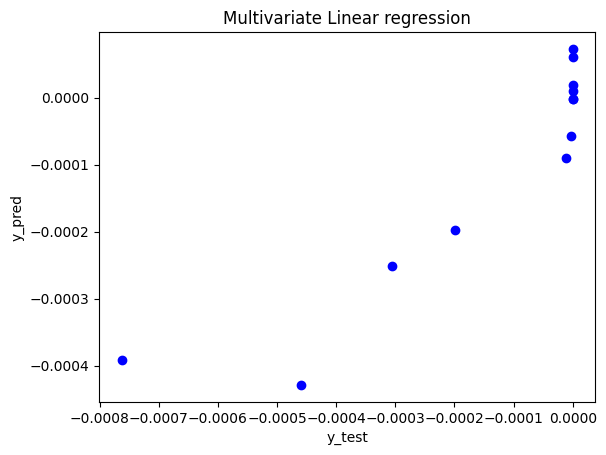

In [26]:
# plotting the points   
plt.plot(y_test,y_pred,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Multivariate Linear regression')  
    
# function to show the plot  
plt.show()  

## 2) POLYNOMIAL REGRESSION

In [13]:
p = dataset.iloc[:, :-1]
q = dataset.iloc[:, 3]

In [14]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size = 0.2, random_state = 0)

## scaling the data


In [27]:
scaler = StandardScaler()
p_train_scaler = scaler.fit_transform(p_train)
p_test_scaler = scaler.transform(p_test)

In [28]:
poly = PolynomialFeatures(degree=2)
p_poly_train = poly.fit_transform(p_train_scaler)
p_test_poly = poly.transform(p_test_scaler)
poly.fit(p_poly_train, q_train)
regressor.fit(p_poly_train, q_train)

LinearRegression()

In [29]:
q_pred = regressor.predict(p_test_poly)

In [51]:
polynomial_score=r2_score(q_test,q_pred)

In [52]:
polynomial_score

-4.095211004484987

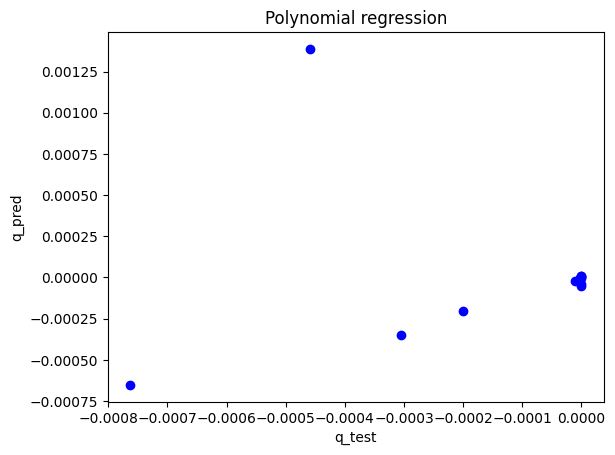

In [53]:
# plotting the points   
plt.plot(q_test,q_pred,"ob")  
    
# naming the x axis  
plt.xlabel('q_test')  
# naming the y axis  
plt.ylabel('q_pred')  
    
# giving a title to my graph  
plt.title('Polynomial regression')  
    
# function to show the plot  
plt.show() 

## 3) RANDOM FOREST REGRESSION

In [33]:
a = dataset.iloc[:, :-1]
b = dataset.iloc[:, 3]

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [34]:
reg = RandomForestRegressor()
reg.fit(a_train, b_train)

RandomForestRegressor()

In [36]:
b_pred_new = reg.predict(a_test)
Random_forest_score=r2_score(b_test,b_pred_new)
Random_forest_score

0.8553730715998029

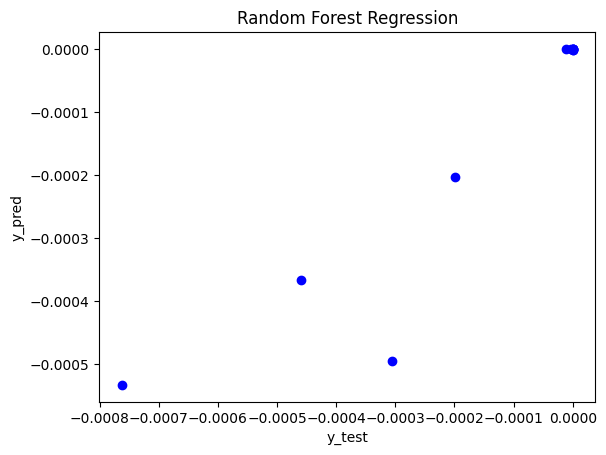

In [56]:
# plotting the points   
plt.plot(b_test,b_pred_new,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Random Forest Regression')  
    
# function to show the plot  
plt.show() 

## 4) SUPPORT VECTOR REGRESSION

In [37]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(x_train)
X_test_scaler = scaler.transform(x_test)

from sklearn.svm import SVR
svr = SVR().fit(x_train, y_train)

In [40]:
y_pred_new = svr.predict(X_test_scaler)
sv_score=r2_score(y_test,y_pred_new)
sv_score

C:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


-0.9999949030968265

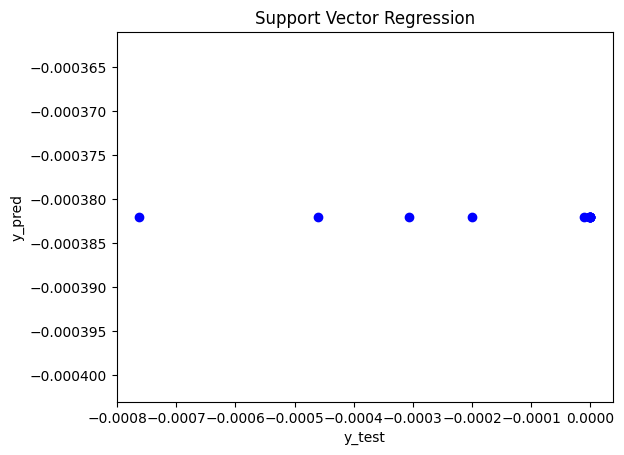

In [58]:
# plotting the points   
plt.plot(y_test,y_pred_new,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Support Vector Regression')  
    
# function to show the plot  
plt.show() 

## 5) DECISION TREE REGRESSION

In [44]:
rg = DecisionTreeRegressor() 
rg.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
y_predict = rg.predict(x_test)

In [47]:
decision_tree_score=r2_score(y_test,y_predict)
decision_tree_score

0.7257206345227281

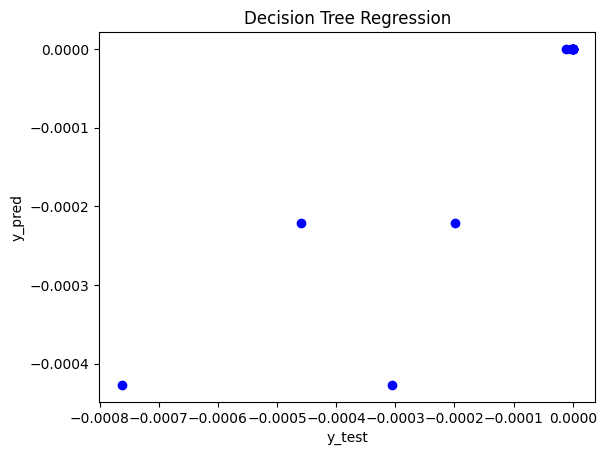

In [59]:
# plotting the points   
plt.plot(y_test,y_predict,"ob")  
    
# naming the x axis  
plt.xlabel('y_test')  
# naming the y axis  
plt.ylabel('y_pred')  
    
# giving a title to my graph  
plt.title('Decision Tree Regression')  
    
# function to show the plot  
plt.show()

## Best Fitting Model

In [61]:
# Create and fit the random forest model
model = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees
model.fit(a,b)  # X represents your independent variables, and y is the dependent variable

# Get feature importances
feature_importances = model.feature_importances_

# Print the feature importances
for i, feature in enumerate(a.columns):
    print(f"Feature: {feature}, Importance: {feature_importances[i]}")


Feature: log(surf T), Importance: 0.040444877218653495
Feature: 1/Esat surf, Importance: 0.04899654636155999
Feature: qair-qsurf, Importance: 0.9105585764197864


In [64]:
b_pred_new = model.predict(a_test)

r2 = r2_score(b_test, b_pred_new)
mse = mean_squared_error(b_test, b_pred_new)
mae = mean_absolute_error(b_test, b_pred_new)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.9756732241517653
Mean Squared Error: 1.3652217741654677e-09
Mean Absolute Error: 1.8482544775000075e-05
